In [31]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim

In [56]:
ruta_carpeta = r'C:\Users\julio\Desktop\The_Bridge\Temario\EDA\Dataset\DataComex\EXPORTACIONES'

archivos_csv = glob.glob(f"{ruta_carpeta}\\*.csv")

dataframes = [pd.read_csv(archivo, sep=';', encoding='latin1') for archivo in archivos_csv]

df = pd.concat(dataframes, ignore_index=True)

In [57]:
columnas_deseadas = ['flujo_codigo', 'periodo_anio', 'pais_nombre', 'taric', 'euros']
df = df[columnas_deseadas]

In [58]:
# Filtrar columnas, caracteres no numéricos y convertir columnas
df['euros'] = df['euros'].replace(',', '.', regex=True).astype(float)
df['periodo_anio'] = df['periodo_anio'].astype(int)
df['pais_nombre'] = df['pais_nombre'].astype(str)

In [59]:
df = df[df['periodo_anio'] != 2023]
df['pais_nombre'] = df['pais_nombre'].str.replace(' (Rep. de Corea)', '')


In [60]:
# Lista de nombres de países a mantener
nombres_paises = [
    'Francia', 'Alemania', 'Italia', 'Portugal', 'Reino Unido', 'Estados Unidos',
    'Países Bajos', 'Bélgica', 'Marruecos', 'Turquía', 'Polonia', 'China',
    'Suiza', 'México', 'Brasil', 'Grecia', 'Suecia', 'Japón', 'Argelia',
    'Austria', 'Rusia', 'República Checa', 'Arabia Saudí', 'Dinamarca',
    'Irlanda', 'Rumanía', 'Australia', 'Canadá', 'Emiratos Árabes Unidos',
    'Hungría', 'Israel', 'Corea del Sur', 'Noruega', 'Gibraltar',
    'Chile', 'Argentina', 'Egipto', 'India', 'Sudáfrica', 'Andorra', 'Finlandia',
    'Hong-Kong', 'Túnez', 'Cuba', 'Eslovaquia', 'Bulgaria', 'Colombia', 'Singapur',
    'Venezuela', 'Eslovenia'
]

# Filtrar el DataFrame
df = df[df['pais_nombre'].isin(nombres_paises)]
df

,flujo_codigo,periodo_anio,pais_nombre,taric,euros
47,E,2000,Alemania,1,4.156381e+05
48,E,2000,Alemania,2,1.439183e+08
49,E,2000,Alemania,3,3.220134e+07
50,E,2000,Alemania,4,2.284754e+07
51,E,2000,Alemania,5,6.270671e+06
...,...,...,...,...,...
365386,E,1999,Venezuela,94,6.434596e+06
365387,E,1999,Venezuela,95,3.429058e+06
365388,E,1999,Venezuela,96,1.117977e+06
365389,E,1999,Venezuela,97,2.998065e+04


In [61]:
df_exp = df

In [62]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129941 entries, 47 to 365390
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   flujo_codigo  129941 non-null  object 
 1   periodo_anio  129941 non-null  int32  
 2   pais_nombre   129941 non-null  object 
 3   taric         129941 non-null  int64  
 4   euros         129941 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 5.5+ MB


## TOP 50 PAISES A LOS QUE MÁS SE EXPORTA

In [63]:
# Agrupar por 'pais_nombre' y 'periodo_anio', sumar 'euros'
df_top = df_exp.groupby('pais_nombre')['euros'].sum().reset_index()

# Ordenar por 'euros' en orden descendente
df_top = df_top.sort_values(by='euros', ascending=False)
df_top.reset_index(drop=True, inplace=True)

df_top

,pais_nombre,euros
0,Francia,9.212156e+11
1,Alemania,5.981147e+11
2,Portugal,4.458760e+11
3,Italia,4.449584e+11
4,Reino Unido,3.881275e+11
5,Estados Unidos,2.333910e+11
6,Países Bajos,1.815782e+11
7,Bélgica,1.623386e+11
8,Marruecos,1.181861e+11
9,Turquía,9.253539e+10


# Acumulado anual (95-22) del total los bienes exportados por país

In [64]:
# Agrupar por 'pais_nombre' y 'periodo_anio', sumar 'euros'
df_paises = df_exp.groupby(['pais_nombre', 'periodo_anio'])['euros'].sum().reset_index()

# Ordenar por 'euros' en orden descendente
df_paises = df_paises.sort_values(by='euros', ascending=False)
df_paises.reset_index(drop=True, inplace=True)

df_paises

,pais_nombre,periodo_anio,euros
0,Francia,2022,6.000677e+10
1,Francia,2021,4.936304e+10
2,Francia,2019,4.414632e+10
3,Francia,2018,4.344096e+10
4,Francia,2020,4.301353e+10
...,...,...,...
1391,Eslovaquia,1995,5.346973e+07
1392,Bulgaria,1998,4.881494e+07
1393,Bulgaria,1995,2.396076e+07
1394,Bulgaria,1996,2.378777e+07


# Acumulado de taric por país

In [65]:
# Agrupar por 'pais_nombre' y 'taric', sumar 'euros'
df_taric = df_exp.groupby(['pais_nombre', 'taric'])['euros'].sum().reset_index()

# Ordenar por 'euros' en orden descendente
df_taric = df_taric.sort_values(by='euros', ascending=False)
df_taric.reset_index(drop=True, inplace=True)

df_taric

,pais_nombre,taric,euros
0,Francia,87,2.549433e+11
1,Alemania,87,1.698154e+11
2,Reino Unido,87,1.050598e+11
3,Italia,87,9.323971e+10
4,Francia,84,6.108978e+10
...,...,...,...
4881,Noruega,80,4.017730e+03
4882,Singapur,80,3.740470e+03
4883,Bulgaria,78,2.172010e+03
4884,Eslovenia,98,6.316400e+02


In [71]:
# Agrupar por 'pais_nombre' y 'periodo_anio', sumar 'euros'
df_anio = df_exp.groupby('periodo_anio')['euros'].sum().reset_index()

# Ordenar por 'euros' en orden descendente
df_anio = df_anio.sort_values(by='periodo_anio', ascending=True)
df_anio.reset_index(drop=True, inplace=True)

df_anio

,periodo_anio,euros
0,1995,6.366553e+10
1,1996,7.046989e+10
2,1997,8.432288e+10
3,1998,9.109293e+10
4,1999,9.822993e+10
5,2000,1.156260e+11
6,2001,1.209427e+11
7,2002,1.247226e+11
8,2003,1.288723e+11
9,2004,1.369401e+11


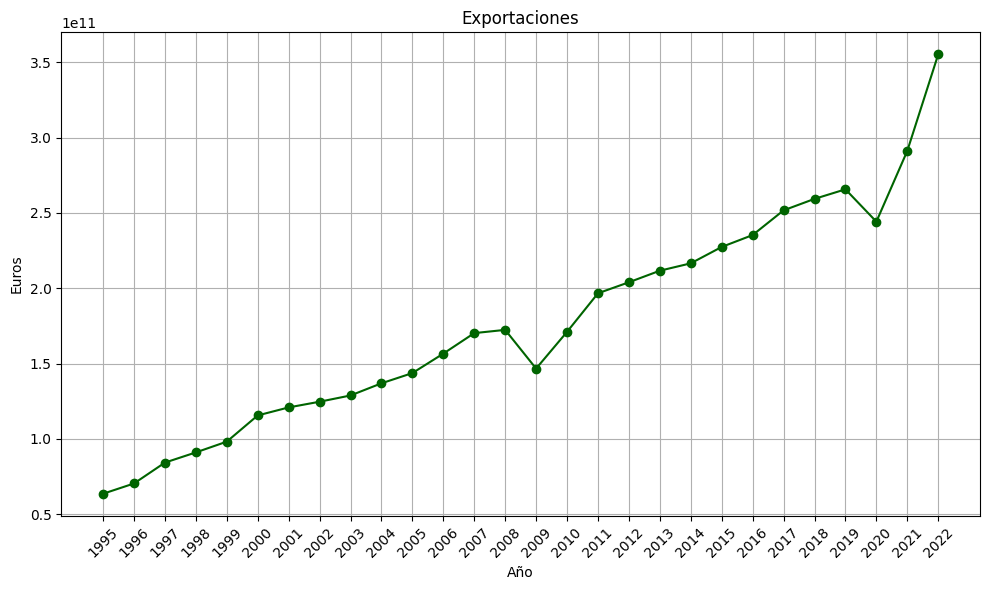

In [72]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(df_anio['periodo_anio'], df_anio['euros'], marker='o', linestyle='-', color='darkgreen')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Euros')
plt.title('Exportaciones')

# Configurar los ticks en el eje x para que aparezcan todos los años
plt.xticks(df_anio['periodo_anio'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Agrupar por 'pais_nombre' y 'periodo_anio', sumar 'euros'
df_taric_anio = df_exp.groupby(['periodo_anio', 'taric'])['euros'].sum().reset_index()

# Ordenar por 'euros' en orden descendente
df_taric_anio = df_taric_anio.sort_values(by='euros', ascending=False)
df_taric_anio.reset_index(drop=True, inplace=True)

df_taric_anio

,periodo_anio,taric,euros
0,2022,87,4.860126e+10
1,2016,87,4.793497e+10
2,2018,87,4.743578e+10
3,2019,87,4.729031e+10
4,2017,87,4.697984e+10
...,...,...,...
2739,1995,50,1.991985e+06
2740,1996,80,1.790577e+06
2741,2013,98,1.767345e+06
2742,1995,80,1.615109e+06


In [18]:
# Agrupar por 'pais_nombre' y 'taric', sumar 'euros'
df_top_taric = df_exp.groupby( 'taric')['euros'].sum().reset_index()

# Ordenar por 'euros' en orden descendente
df_top_taric = df_top_taric.sort_values(by='euros', ascending=False)
df_top_taric.reset_index(drop=True, inplace=True)

df_top_taric

,taric,euros
0,87,9.646540e+11
1,84,3.881701e+11
2,85,3.037251e+11
3,27,2.180194e+11
4,30,1.978466e+11
...,...,...
93,98,4.525642e+08
94,46,3.848776e+08
95,67,3.202264e+08
96,50,3.039920e+08


In [73]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

# Obtener las coordenadas para cada país en df_top
for index, row in df_top.iterrows():
    location = geolocator.geocode(row['pais_nombre'])
    if location:
        df_top.at[index, 'Latitude'] = location.latitude
        df_top.at[index, 'Longitude'] = location.longitude


In [80]:
import folium

# Crear un mapa centrado en una ubicación inicial
m = folium.Map(location=[0, 0], zoom_start=2)

# Agregar burbujas para cada país en el DataFrame df_top
for index, row in df_top.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['euros'] / 1e11,  # Ajusta el tamaño de la burbuja en función del valor de euros
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"{row['pais_nombre']} - {row['euros']:.2e} euros"
    ).add_to(m)

# Guardar el mapa como un archivo HTML
m.save('mapa_burbujas.html')


In [81]:
from IPython.display import IFrame

# Nombre del archivo HTML generado por Folium
nombre_archivo = 'mapa_burbujas.html'

# Mostrar el mapa en el notebook usando IFrame
IFrame(nombre_archivo, width='100%', height=500)


In [82]:
df_top

,pais_nombre,euros,Latitude,Longitude
0,Francia,9.212156e+11,46.603354,1.888334
1,Alemania,5.981147e+11,52.517037,13.388860
2,Portugal,4.458760e+11,39.662165,-8.135352
3,Italia,4.449584e+11,42.638426,12.674297
4,Reino Unido,3.881275e+11,54.702354,-3.276575
5,Estados Unidos,2.333910e+11,39.783730,-100.445882
6,Países Bajos,1.815782e+11,52.247650,5.541247
7,Bélgica,1.623386e+11,50.640281,4.666715
8,Marruecos,1.181861e+11,28.334772,-10.371338
9,Turquía,9.253539e+10,38.959759,34.924965


In [86]:
# Ruta y nombre de archivo Excel donde se guardará el DataFrame
ruta_archivo_excel = r'C:\Users\julio\Desktop\The_Bridge\Temario\EDA\Notebooks\df_top.xlsx'


# Exportar el DataFrame a un archivo Excel
df_top.to_excel(ruta_archivo_excel, index=False) 